
## **Descrição de Entidades e Relacionamentos (ER)**   ##


---

### **empresas**

* **Chave primária (PK):** `id_empresa`
* **Atributos:** `id_empresa`, `nome_fantasia`, `cnpj`, `data_fundacao`
* **Relacionamentos:**

  * `receitas.id_empresa` → uma empresa pode ter várias receitas → **1\:N**
  * `despesas.id_empresa` → uma empresa pode ter várias despesas → **1\:N**
  * `orcamentos.id_empresa` → uma empresa pode ter vários orçamentos → **1\:N**
  * `transferencias.id_empresa_origem` → uma empresa pode ser origem de várias transferências → **1\:N**
  * `transferencias.id_empresa_destino` → uma empresa pode ser destino de várias transferências → **1\:N**

---

### **clientes**

* **Chave primária (PK):** `id_cliente`
* **Atributos:** `id_cliente`, `nome`, `email`, `cpf`
* **Relacionamentos:**

  * `receitas.id_cliente` → um cliente pode estar associado a várias receitas → **1\:N**
  * `despesas.id_cliente` → um cliente pode estar associado a várias despesas → **1\:N**

---

### **receitas**

* **Chave primária (PK):** `id_receita`
* **Chaves estrangeiras (FKs):**

  * `id_empresa` → **empresas(id\_empresa)**
  * `id_cliente` → **clientes(id\_cliente)** *(opcional)*
* **Atributos:** `id_receita`, `id_empresa`, `id_cliente`, `categoria`, `valor`, `data`, `descricao`
* **Relacionamentos:**

  * `id_empresa` → uma receita pertence a uma empresa → **N:1**
  * `id_cliente` → uma receita pode estar vinculada a um cliente → **N:1 (opcional)**

---

### **despesas**

* **Chave primária (PK):** `id_despesa`
* **Chaves estrangeiras (FKs):**

  * `id_empresa` → **empresas(id\_empresa)**
  * `id_cliente` → **clientes(id\_cliente)** *(opcional)*
* **Atributos:** `id_despesa`, `id_empresa`, `id_cliente`, `categoria`, `valor`, `data`, `descricao`
* **Relacionamentos:**

  * `id_empresa` → uma despesa pertence a uma empresa → **N:1**
  * `id_cliente` → uma despesa pode estar vinculada a um cliente → **N:1 (opcional)**

---

### **orcamentos**

* **Chave primária (PK):** `id_orcamento`
* **Chave estrangeira (FK):**
  * `id_empresa` → **empresas(id\_empresa)**
* **Atributos:** `id_orcamento`, `id_empresa`, `ano`, `mes`, `tipo`, `valor_estimado`
* **Relacionamentos:**

  * `id_empresa` → um orçamento pertence a uma empresa → **N:1**

---

### **transferencias**

* **Chave primária (PK):** `id_transferencia`
* **Chaves estrangeiras (FKs):**

  * `id_empresa_origem` → **empresas(id\_empresa)**
  * `id_empresa_destino` → **empresas(id\_empresa)**
* **Atributos:** `id_transferencia`, `id_empresa_origem`, `id_empresa_destino`, `tipo`, `valor`, `data`, `descricao`
* **Relacionamentos:**

  * `id_empresa_origem` → uma transferência tem uma empresa de origem → **N:1**
  * `id_empresa_destino` → uma transferência tem uma empresa de destino → **N:1**

---



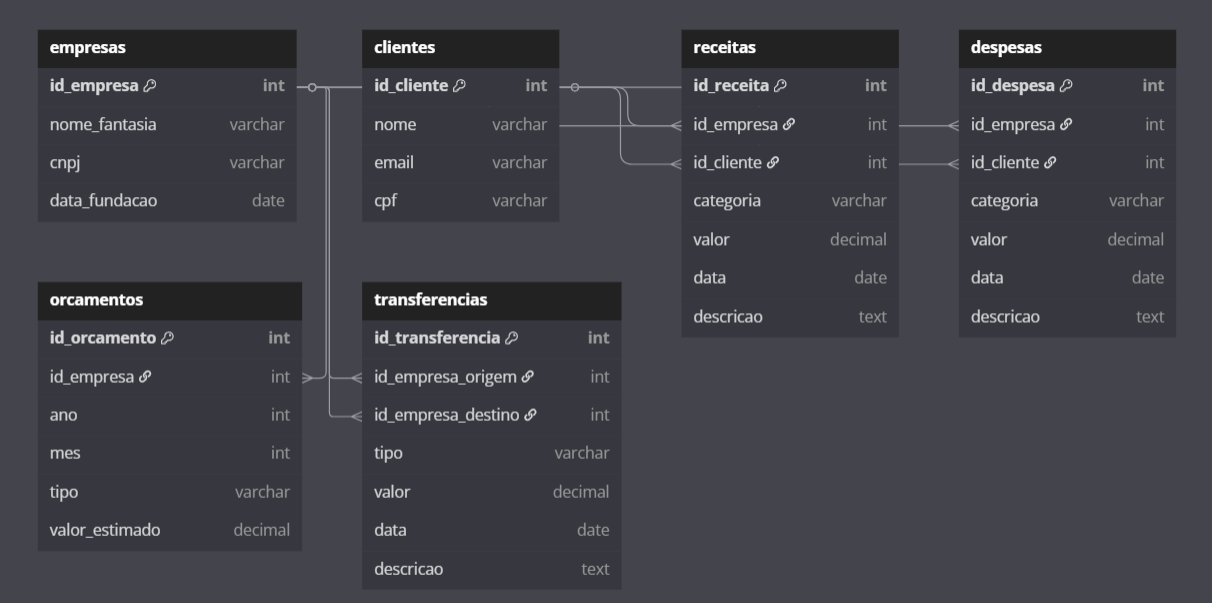

**Modelo entidade relacionamento** -> `(MER)`

In [ ]:
modelo_relacional = {
    "empresas": {
        "pk": ["id_empresa"],
        "atributos": ["nome_fantasia", "cnpj", "data_fundacao"],
        "relacionamentos": []
    },
    "clientes": {
        "pk": ["id_cliente"],
        "atributos": ["nome", "email", "cpf"],
        "relacionamentos": []
    },
    "receitas": {
        "pk": ["id_receita"],
        "atributos": ["categoria", "valor", "data", "descricao"],
        "relacionamentos": [
            {"fk": "id_empresa", "referencia": "empresas(id_empresa)"},
            {"fk": "id_cliente", "referencia": "clientes(id_cliente)"}
        ]
    },
    "despesas": {
        "pk": ["id_despesa"],
        "atributos": ["categoria", "valor", "data", "descricao"],
        "relacionamentos": [
            {"fk": "id_empresa", "referencia": "empresas(id_empresa)"},
            {"fk": "id_cliente", "referencia": "clientes(id_cliente)"}
        ]
    },
    "orcamentos": {
        "pk": ["id_orcamento"],
        "atributos": ["ano", "mes", "tipo", "valor_estimado"],
        "relacionamentos": [
            {"fk": "id_empresa", "referencia": "empresas(id_empresa)"}
        ]
    },
    "transferencias": {
        "pk": ["id_transferencia"],
        "atributos": ["tipo", "valor", "data", "descricao"],
        "relacionamentos": [
            {"fk": "id_empresa_origem", "referencia": "empresas(id_empresa)"},
            {"fk": "id_empresa_destino", "referencia": "empresas(id_empresa)"}
        ]
    }
}

# exibir modelo relacional
for tabela, dados in modelo_relacional.items():
    print(f"\nTabela: {tabela}")
    print(f"  PK: {', '.join(dados['pk'])}")
    print(f"  Atributos: {', '.join(dados['atributos'])}")
    if dados["relacionamentos"]:
        print("  Relacionamentos:")
        for rel in dados["relacionamentos"]:
            print(f"    FK {rel['fk']} → {rel['referencia']}")



Tabela: empresas
  PK: id_empresa
  Atributos: nome_fantasia, cnpj, data_fundacao

Tabela: clientes
  PK: id_cliente
  Atributos: nome, email, cpf

Tabela: receitas
  PK: id_receita
  Atributos: categoria, valor, data, descricao
  Relacionamentos:
    FK id_empresa → empresas(id_empresa)
    FK id_cliente → clientes(id_cliente)

Tabela: despesas
  PK: id_despesa
  Atributos: categoria, valor, data, descricao
  Relacionamentos:
    FK id_empresa → empresas(id_empresa)
    FK id_cliente → clientes(id_cliente)

Tabela: orcamentos
  PK: id_orcamento
  Atributos: ano, mes, tipo, valor_estimado
  Relacionamentos:
    FK id_empresa → empresas(id_empresa)

Tabela: transferencias
  PK: id_transferencia
  Atributos: tipo, valor, data, descricao
  Relacionamentos:
    FK id_empresa_origem → empresas(id_empresa)
    FK id_empresa_destino → empresas(id_empresa)


**CRIAÇÃO DAS TABELAS** -> `CREATE`

In [ ]:
import sqlite3

# conectando/criando bd local
conexao = sqlite3.connect("financeiro.db")
cursor = conexao.cursor()

# criando  tabelas(empresas, clientes, ..., trasnferências)
cursor.execute("""
CREATE TABLE IF NOT EXISTS empresas (
    id_empresa INTEGER PRIMARY KEY,
    nome_fantasia TEXT NOT NULL,
    cnpj TEXT UNIQUE,
    data_fundacao DATE
);
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS clientes (
    id_cliente INTEGER PRIMARY KEY,
    nome TEXT NOT NULL,
    email TEXT,
    cpf TEXT UNIQUE
);
""")


cursor.execute("""
CREATE TABLE IF NOT EXISTS receitas (
    id_receita INTEGER PRIMARY KEY,
    id_empresa INTEGER NOT NULL,
    id_cliente INTEGER NOT NULL,
    categoria TEXT,
    valor REAL NOT NULL,
    data DATE,
    descricao TEXT,
    FOREIGN KEY (id_empresa) REFERENCES empresas(id_empresa),
    FOREIGN KEY (id_cliente) REFERENCES clientes(id_cliente)
);
""")


cursor.execute("""
CREATE TABLE IF NOT EXISTS despesas (
    id_despesa INTEGER PRIMARY KEY,
    id_empresa INTEGER NOT NULL,
    id_cliente INTEGER,
    categoria TEXT,
    valor REAL NOT NULL,
    data DATE,
    descricao TEXT,
    FOREIGN KEY (id_empresa) REFERENCES empresas(id_empresa),
    FOREIGN KEY (id_cliente) REFERENCES clientes(id_cliente)
);
""")


cursor.execute("""
CREATE TABLE IF NOT EXISTS orcamentos (
    id_orcamento INTEGER PRIMARY KEY,
    id_empresa INTEGER NOT NULL,
    ano INTEGER NOT NULL,
    mes INTEGER NOT NULL,
    tipo TEXT NOT NULL CHECK (tipo IN ('receita', 'despesa')),
    valor_estimado REAL NOT NULL,
    FOREIGN KEY (id_empresa) REFERENCES empresas(id_empresa)
);
""")


cursor.execute("""
CREATE TABLE IF NOT EXISTS transferencias (
    id_transferencia INTEGER PRIMARY KEY,
    id_empresa_origem INTEGER NOT NULL,
    id_empresa_destino INTEGER NOT NULL,
    tipo TEXT,
    valor REAL NOT NULL,
    data DATE,
    descricao TEXT,
    FOREIGN KEY (id_empresa_origem) REFERENCES empresas(id_empresa),
    FOREIGN KEY (id_empresa_destino) REFERENCES empresas(id_empresa)
);
""")




**Data Ingestão`_py`**

In [ ]:
import pandas as pd

# dicionário pareado: nomes e caminhos 'path' dos arquivos
caminhos_csv = {
    "clientes": "/content/clientes.csv",
    "despesas": "/content/despesas.csv",
    "empresas": "/content/empresas.csv",
    "orcamentos": "/content/orcamentos.csv",
    "receitas": "/content/receitas.csv",
    "transferencias": "/content/transferencias.csv"
}

# lê todos os arquivos de forma iteravel e armazena em um dicionário de dataframes (dfs)
dfs = {nome: pd.read_csv(caminho) for nome, caminho in caminhos_csv.items()}

# exibir dataframe, exemplo
dfs["receitas"]



,id_receita,id_empresa,id_cliente,categoria,valor,data,descricao
0,1,6,107,Serviço,84587.43,2025-04-03,Ab quo dolorum iusto fugiat facilis tempora.
1,2,6,172,Consultoria,71949.15,2024-11-08,Autem ipsa saepe cum explicabo.
2,3,6,192,Consultoria,12288.31,2024-09-29,Facere sit dicta.
3,4,4,101,Licenciamento,36158.76,2024-06-26,Aliquam hic quia tempore cum.
4,5,5,171,Licenciamento,70507.51,2024-06-30,Vero voluptatem blanditiis laudantium libero p...
...,...,...,...,...,...,...,...
995,996,3,174,Venda Produto,97795.56,2024-09-13,Accusamus ex voluptates vel placeat illo.
996,997,9,138,Consultoria,40798.28,2024-06-11,Minima quo cupiditate voluptatem.
997,998,9,139,Licenciamento,91013.85,2024-06-06,Necessitatibus voluptas quidem veritatis nam m...
998,999,1,136,Serviço,70329.21,2025-01-03,Doloremque numquam molestiae quos sint.


In [ ]:
# função auxiliar para inserir os dados com tratamento de erros
def inserir_dados(tabela, df):
    """
    Insere os dados de um DataFrame em uma tabela SQLite, ignorando erros de chave primária duplicada.

    Parâmetros:
    ----------
    tabela : str
        Nome da tabela no banco de dados SQLite onde os dados serão inseridos.

    df : pandas.DataFrame
        DataFrame contendo os dados a serem inseridos. As colunas devem corresponder
        aos nomes das colunas da tabela no banco de dados.

    Comportamento:
    --------------
    Para cada linha do DataFrame, a função tenta inserir os dados na tabela.
    Caso ocorra um erro de integridade (como duplicata de chave primária), a linha é ignorada
    e o processo continua com as próximas.

    Notas:
    ------
    - A função assume que existe um cursor SQLite já definido com o nome 'cursor'.
    - O commit das transações deve ser feito fora da função, se necessário.
    """

    colunas = ", ".join(df.columns)
    valores = ", ".join(["?" for _ in df.columns])
    sql = f"INSERT INTO {tabela} ({colunas}) VALUES ({valores})"
    for _, row in df.iterrows():
        try:
            cursor.execute(sql, tuple(row))
        except sqlite3.IntegrityError:
            continue  # ignora duplicatas de chave primária


# ordem de inserção considerando dependências
ordem_insercao = ["clientes", "empresas", "despesas", "receitas", "orcamentos", "transferencias"]

# insere os dados em cada tabela
for tabela in ordem_insercao:
    inserir_dados(tabela, dfs[tabela])

# commit e fecha conexão
conexao.commit()
conexao.close()

print("Dados carregados no banco de dados: financeiro.db")


Dados carregados no banco de dados: financeiro.db


---

In [ ]:
import sqlite3
import pandas as pd

# conectar ao banco
conexao = sqlite3.connect("financeiro.db")

# lista tabelas
tabelas = ["clientes", "empresas", "despesas", "receitas", "orcamentos", "transferencias"]

# dados de cada tabela
for tabela in tabelas:
    print(f"\n Tabela: {tabela}")
    df = pd.read_sql_query(f"SELECT * FROM {tabela}", conexao)
    display(df)

# fechar conexão
conexao.close()



 Tabela: clientes


,id_cliente,nome,email,cpf
0,101,Bruna Pereira,mnascimento@souza.org,801.542.697-94
1,102,Bruna Ramos,clara28@jesus.net,259.460.718-58
2,103,João Guilherme Lima,duarteisabel@cardoso.br,182.953.647-82
3,104,Marcelo da Paz,cmoura@bol.com.br,713.802.549-14
4,105,Clarice Almeida,diasdaniel@melo.net,473.916.805-75
...,...,...,...,...
95,196,Fernando da Paz,leticiajesus@bol.com.br,812.469.573-37
96,197,Amanda Araújo,ferreiramaite@peixoto.org,473.658.210-35
97,198,Srta. Bruna Pires,nrezende@yahoo.com.br,925.678.410-67
98,199,Sr. Ian Duarte,fogacaana-sophia@hotmail.com,210.934.576-43



 Tabela: empresas


,id_empresa,nome_fantasia,cnpj,data_fundacao
0,1,Araújo e Filhos,43.815.092/0001-70,2017-06-18
1,2,Araújo S/A,39.041.687/0001-49,2017-12-05
2,3,Almeida,26.591.780/0001-85,2011-11-12
3,4,Castro,59.460.381/0001-34,2011-08-17
4,5,Moreira,93.105.726/0001-70,2014-03-31
5,6,Nascimento Ltda.,75.296.183/0001-33,2021-11-30
6,7,da Cunha - EI,32.798.415/0001-49,2015-10-21
7,8,Dias S/A,56.401.728/0001-80,2021-06-08
8,9,Novaes,72.416.983/0001-52,2020-03-25
9,10,Nunes,53.248.069/0001-03,2012-11-19



 Tabela: despesas


,id_despesa,id_empresa,id_cliente,categoria,valor,data,descricao
0,1,5,165,Serviços,13304.94,2024-05-02,Eligendi nisi sapiente.
1,2,1,112,Serviços,41638.06,2024-12-31,Enim ab autem consequatur eaque facilis illo.
2,3,1,101,Impostos,38784.84,2024-05-01,Amet natus facere enim harum ipsum.
3,4,5,121,Serviços,28032.34,2024-11-13,Repudiandae numquam nostrum consectetur atque.
4,5,7,172,Fornecedores,6481.82,2024-09-05,Nam facilis corporis nobis illo aliquam.
...,...,...,...,...,...,...,...
995,996,8,141,Fornecedores,49052.87,2024-10-23,Cupiditate voluptas excepturi perspiciatis rer...
996,997,1,114,Serviços,21204.59,2025-03-13,Enim laboriosam eaque a.
997,998,9,171,Fornecedores,41469.53,2024-12-15,Hic ullam ut vero maiores tempora vel.
998,999,10,180,Impostos,44615.43,2025-03-26,Sed animi ab itaque error autem expedita quam.



 Tabela: receitas


,id_receita,id_empresa,id_cliente,categoria,valor,data,descricao
0,1,6,107,Serviço,84587.43,2025-04-03,Ab quo dolorum iusto fugiat facilis tempora.
1,2,6,172,Consultoria,71949.15,2024-11-08,Autem ipsa saepe cum explicabo.
2,3,6,192,Consultoria,12288.31,2024-09-29,Facere sit dicta.
3,4,4,101,Licenciamento,36158.76,2024-06-26,Aliquam hic quia tempore cum.
4,5,5,171,Licenciamento,70507.51,2024-06-30,Vero voluptatem blanditiis laudantium libero p...
...,...,...,...,...,...,...,...
995,996,3,174,Venda Produto,97795.56,2024-09-13,Accusamus ex voluptates vel placeat illo.
996,997,9,138,Consultoria,40798.28,2024-06-11,Minima quo cupiditate voluptatem.
997,998,9,139,Licenciamento,91013.85,2024-06-06,Necessitatibus voluptas quidem veritatis nam m...
998,999,1,136,Serviço,70329.21,2025-01-03,Doloremque numquam molestiae quos sint.



 Tabela: orcamentos


,id_orcamento,id_empresa,ano,mes,tipo,valor_estimado



 Tabela: transferencias


,id_transferencia,id_empresa_origem,id_empresa_destino,tipo,valor,data,descricao
0,1,10,8,Recebimento,24822.29,2024-12-05,Optio molestiae voluptate nisi porro.
1,2,7,4,Pagamento,6815.38,2024-10-28,Officiis error non sapiente non.
2,3,9,6,Pagamento,51031.81,2024-11-14,Architecto assumenda expedita numquam magni vi...
3,4,3,10,Recebimento,20591.02,2024-12-24,At unde doloremque molestias ipsum labore.
4,5,2,10,Recebimento,22545.42,2024-11-09,Ad nulla eius quos.
...,...,...,...,...,...,...,...
495,496,6,1,Interna,3821.35,2024-06-06,Ut quisquam delectus sequi commodi ab.
496,497,1,7,Interna,20686.87,2024-07-14,Ut officia eos recusandae ea.
497,498,5,2,Pagamento,13753.96,2024-08-11,Tempore esse enim quos fuga dolore ipsa.
498,499,8,6,Pagamento,22000.61,2024-06-19,Sed repellendus modi est.


---
**PIPELINE**

In [ ]:
# importar bibliotecas
import pandas as pd
import sqlite3
import re
import os

# definir esquema completo de colunas por tabela com base nas planilhas fornecidas
esquemas = {
    'clientes': {
        'id_cliente': int,
        'nome': str,
        'email': str,
        'cpf': str
    },
    'despesas': {
        'id_despesa': int,
        'id_empresa': int,
        'id_cliente': int,
        'categoria': str,
        'valor': float,
        'data': 'date',
        'descricao': str
    },
    'empresas': {
        'id_empresa': int,
        'nome_fantasia': str,
        'cnpj': str,
        'data_fundacao': 'date'
    },
    'orcamentos': {
        'id_orcamento': int,
        'id_empresa': int,
        'ano': int,
        'mes': int,
        'tipo': str,
        'valor_estimado': float
    },
    'receitas': {
        'id_receita': int,
        'id_empresa': int,
        'id_cliente': int,
        'categoria': str,
        'valor': float,
        'data': 'date',
        'descricao': str
    },
    'transferencias': {
        'id_transferencia': int,
        'id_empresa_origem': int,
        'id_empresa_destino': int,
        'tipo': str,
        'valor': float,
        'data': 'date',
        'descricao': str
    }
}

# função para listar arquivos csv automaticamente
def listar_arquivos_csv(pasta='.'):
    """
    Lista automaticamente os arquivos .csv presentes em uma pasta.

    Parâmetros:
    -----------
    pasta : str
        Caminho da pasta onde os arquivos serão listados. Por padrão, é a pasta atual ('.').

    Retorna:
    --------
    dict
        Um dicionário no formato {nome_arquivo_sem_extensao: caminho_completo_para_arquivo_csv}
    """
    return {
        os.path.splitext(f)[0]: os.path.join(pasta, f)
        for f in os.listdir(pasta)
        if f.endswith('.csv')
    }

# padronizar nomes de colunas para snake_case
def snake_case(texto: str):
    """
    Converte uma string para o formato snake_case.

    Parâmetros:
    -----------
    texto : str
        String a ser convertida.

    Retorna:
    --------
    str
        String convertida para snake_case.
    """
    texto = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', texto)
    texto = re.sub(r'[\s\-]+', '_', texto)
    return texto.lower()

# formatar colunas monetárias para exibição
def formatar_valores(dados: pd.DataFrame):
    """
    Formata colunas com a palavra 'valor' para o padrão monetário brasileiro (BRL).

    Parâmetros:
    -----------
    dados : pd.DataFrame
        DataFrame com colunas a serem formatadas.

    Retorna:
    --------
    pd.DataFrame
        DataFrame com os valores monetários formatados.
    """
    for coluna in dados.columns:
        if 'valor' in coluna:
            dados[coluna] = dados[coluna].apply(
                lambda x: f'R$ {x:,.2f}'.replace('.', '#').replace(',', '.').replace('#', ',')
                if pd.notnull(x) else x
            )
    return dados

# tratar, limpar e validar dados
def tratar_csv(caminho: str, nome_tabela: str):
    """
    Realiza o tratamento e validação de dados de um arquivo CSV conforme esquema definido.

    Parâmetros:
    -----------
    caminho : str
        Caminho para o arquivo CSV a ser tratado.

    nome_tabela : str
        Nome da tabela que será usada como referência de esquema.

    Retorna:
    --------
    pd.DataFrame
        DataFrame tratado e validado.
    """
    tabela = pd.read_csv(caminho)
    tabela.columns = [snake_case(col) for col in tabela.columns]

    for coluna in tabela.columns:
        if 'data' in coluna or 'dt' in coluna:
            tabela[coluna] = pd.to_datetime(tabela[coluna], errors='coerce').dt.date

    tabela = tabela.drop_duplicates()
    tabela = tabela.dropna(how='all')

    for coluna in tabela.columns:
        if tabela[coluna].dtype in ['float64', 'int64']:
            tabela[coluna] = tabela[coluna].fillna(0)
        elif tabela[coluna].dtype == 'object':
            tabela[coluna] = tabela[coluna].fillna('desconhecido')
        elif 'data' in coluna or 'dt' in coluna:
            tabela[coluna] = tabela[coluna].fillna(pd.NaT)

    if nome_tabela in esquemas:
        esquema = esquemas[nome_tabela]
        colunas_esperadas = set(esquema.keys())
        colunas_encontradas = set(tabela.columns)
        faltantes = colunas_esperadas - colunas_encontradas

        if faltantes:
            print(f'Aviso: Tabela "{nome_tabela}" está com colunas faltantes: {faltantes}')

        for coluna, tipo_esperado in esquema.items():
            if coluna in tabela.columns:
                if tipo_esperado == int:
                    tabela[coluna] = pd.to_numeric(tabela[coluna], errors='coerce').fillna(0).astype(int)
                elif tipo_esperado == float:
                    tabela[coluna] = pd.to_numeric(tabela[coluna], errors='coerce').fillna(0.0)
                elif tipo_esperado == 'date':
                    tabela[coluna] = pd.to_datetime(tabela[coluna], errors='coerce').dt.date
                elif tipo_esperado == str:
                    tabela[coluna] = tabela[coluna].astype(str).fillna('desconhecido')

    return tabela

# criar schema em SQL
script_schema = '''
    create table if not exists clientes (
        id_cliente integer primary key,
        nome text,
        email text,
        cpf text
    );

    create table if not exists despesas (
        id_despesa integer primary key,
        id_empresa integer,
        id_cliente integer,
        categoria text,
        valor real,
        data date,
        descricao text
    );

    create table if not exists empresas (
        id_empresa integer primary key,
        nome_fantasia text,
        cnpj text,
        data_fundacao date
    );

    create table if not exists orcamentos (
        id_orcamento integer primary key,
        id_empresa integer,
        ano integer,
        mes integer,
        tipo text,
        valor_estimado real
    );

    create table if not exists receitas (
        id_receita integer primary key,
        id_empresa integer,
        id_cliente integer,
        categoria text,
        valor real,
        data date,
        descricao text
    );

    create table if not exists transferencias (
        id_transferencia integer primary key,
        id_empresa_origem integer,
        id_empresa_destino integer,
        tipo text,
        valor real,
        data date,
        descricao text
    );
'''

# função para carregar dados no SQLite
def carregar_para_sqlite(banco_dados='dados.db', pasta_csv='.'):
    """
    Carrega dados CSV tratados em um banco SQLite com base no schema definido.

    Parâmetros:
    -----------
    banco_dados : str
        Caminho para o arquivo .db do SQLite (será criado se não existir).

    pasta_csv : str
        Caminho da pasta contendo os arquivos .csv.
    """
    arquivos_csv = listar_arquivos_csv(pasta_csv)
    conexao = sqlite3.connect(banco_dados)
    cursor = conexao.cursor()

    cursor.executescript(script_schema)

    for nome_tabela, caminho_arquivo in arquivos_csv.items():
        print(f'carregando {nome_tabela} ...')
        dados = tratar_csv(caminho_arquivo, nome_tabela)

        colunas = ', '.join(dados.columns)
        placeholders = ', '.join(['?' for _ in dados.columns])
        query = f'insert into {nome_tabela} ({colunas}) values ({placeholders})'

        cursor.executemany(query, dados.values.tolist())
        conexao.commit()

    print('dados carregados com sucesso.')
    conexao.close()

# executar carga
if __name__ == '__main__':
    carregar_para_sqlite()
    print('pipeline concluído.')


carregando transferencias ...
carregando receitas ...
carregando clientes ...
carregando empresas ...
carregando orcamentos ...
carregando despesas ...
dados carregados com sucesso.
pipeline concluído.
